## Importing Libraies

In [370]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.preprocessing import OneHotEncoder

## Reading The Data

In [371]:
df = pd.read_csv('Cardetails.csv')

## Drop Unnecessary column and Duplicated Values

In [ ]:
df = df.drop(columns=['torque'])
df.dropna(inplace= True)
df.drop_duplicates(inplace= True)

## Functions to extract brand name only and number without the unit

In [372]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()


def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [373]:
df['name'] = df['name'].apply(get_brand_name)

df['mileage'] = df['mileage'].apply(clean_data)
df['max_power'] = df['max_power'].apply(clean_data)
df['engine'] = df['engine'].apply(clean_data)

## Encoding and Scaling

In [374]:
from sklearn.model_selection import train_test_split
import pandas as pd


cars_data = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)


x = cars_data.drop(columns='selling_price')  
y = df['selling_price']  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

## Models

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Metrics:")
print(f"  MSE: {lr_mse}")
print(f"  MAE: {lr_mae}")
print(f"  R2 Score: {lr_r2}")


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("\nKNN Regressor Metrics:")
print(f"  MSE: {knn_mse}")
print(f"  MAE: {knn_mae}")
print(f"  R2 Score: {knn_r2}")

Linear Regression Metrics:
  MSE: 90071528414.77158
  MAE: 146477.16443452382
  R2 Score: 0.6996206454122683

KNN Regressor Metrics:
  MSE: 69481012298.02956
  MAE: 108322.29360119047
  R2 Score: 0.7682879151991651


In [376]:
knn_predictions

array([ 336000. ,  605000. , 1020199.8, ...,  697000. ,  680000. ,
         99000. ])

In [377]:
lr_predictions

array([ 429440.,  713088., 1130880., ...,  636288.,  599424.,   61824.])

## Regression Loss Curve

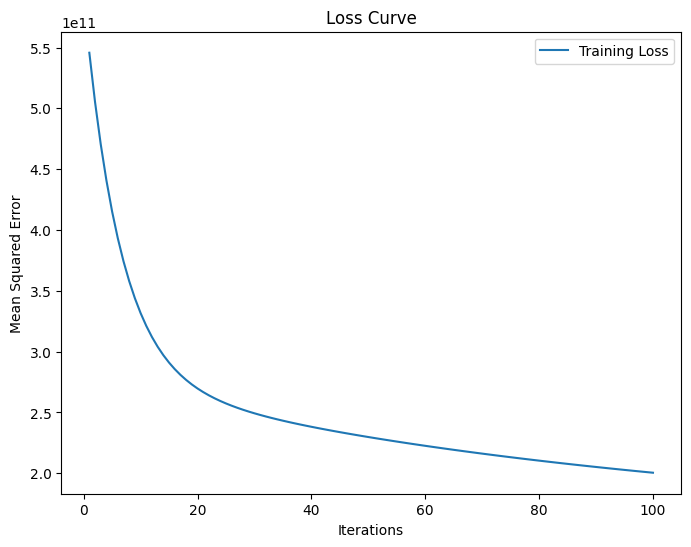

In [378]:
loss = []
lr_rate = 0.01
weights = np.zeros(x_train.shape[1])
iterations = 100

for i in range(iterations):
    y_pred = np.dot(x_train, weights)
    error = y_train - y_pred
    mse = (error**2).mean()
    loss.append(mse)
    gradient = -(2/len(x_train)) * np.dot(x_train.T, error)
    weights -= lr_rate * gradient


plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations+1), loss, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve')
plt.legend()
plt.show()


## KNN loss Curve

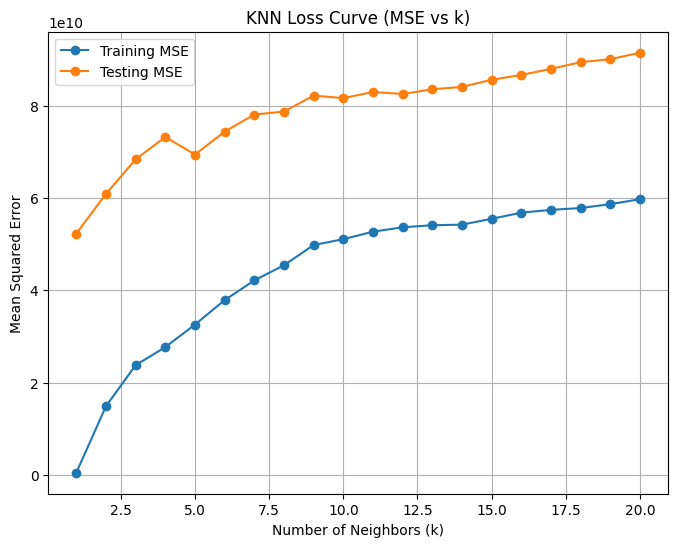

In [380]:
train_mse = []
test_mse = []

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    

    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))


plt.figure(figsize=(8, 6))
plt.plot(k_values, train_mse, label='Training MSE', marker='o')
plt.plot(k_values, test_mse, label='Testing MSE', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Loss Curve (MSE vs k)')
plt.legend()
plt.grid()
plt.show()
